# Datenvisualisierung mit Python/Matplotlib: 1D, 2D und 3D

Beispiel: Simulation der Brownschen Bewegung in einer, zwei und drei Dimensionen. Die Zeitachse ist als weitere Dimension auch immer Teil der Visualisierung.

Die benötigten Module Numpy und MatPlotLib sind in den meisten Standardinstallation schon mit dabei; das Modul muss Scipy zusätzlich installiert werden.Installieren von Scipy mit Anaconda (im Anaconda Prompt (Windows) oder Terminal (Linux oder MacOS):

    conda install scipy


#### Module importieren

In [1]:
#Numpy importieren
import numpy as np

In [2]:
# Matplotlib importieren
import matplotlib.pyplot as plt

In [3]:
# Scipy: benötigte Funktionen importieren
from scipy.stats import norm

## Brownsche Bewegung simulieren: Grundlagen

Brownsche Bewegung: Erklärung bei Wolfram Alpha: 
https://www.wolframalpha.com/input?i=Brownian+motion

Link zum SciPy Cookbook:
https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html

Von Scipy wird die Funktion scipy.stats.norm() benötigt: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
Damit können normalverteilte Zufallszahlen generiert werden.

Die Daten können effizienter erzeugt werden wenn die SciPy-Funktion nur einmal pro Simulation aufgerufen wird. Dazu wird die Funktion brownian(x0, n, dt, delta, out=None) definiert. Parameter der Funktion:
    
    x0 = Anfangsposition
    n = Anzahl Schritte
    dt = Zeitschritt
    delta = Parameter für die Geschwindigkeit der Brownschen Bewegung
    out = Output-Array (wird generiert falls nicht anders spezifiziert)

In [4]:
# Funktion zur Berechnung der Brownschen Bewegung:
def brownian(x0, n, dt, delta, out=None):

    x0 = np.asarray(x0) # Punkte auf der x-Achse

    # Generiere für jedes x0-Element n Zahlen aus einer Normalverteilung
    r = norm.rvs(size=x0.shape + (n,), scale=delta*np.sqrt(dt))

    # Output-Array generieren (falls nicht vorhanden)
    if out is None:
        out = np.empty(r.shape)

    # Brownsche Bewegung wird als kummulative Summe der n sample berechnet
    np.cumsum(r, axis=-1, out=out)

    #  Anfangsbedingung
    out += np.expand_dims(x0, axis=-1)

    return out

## Brownsche Bewegung in 1D

Die Parameter der Simulation werden zuerst definiert.

In [5]:
# Parameter definieren
delta = 0.25 # Paramenter für die Geschwindigkeit der Brownschen Bewegung 
T = 10.0 # Zeit insgesamt
n = 500 # Anzahl Schritte
dt = T/n # Zeitschritt
m = 10 # Anzahl Realisierungen (Trajektorien)

Die Arrays für die Trajektorien werden initialisiert und dann durch Aufrufen der Funktion brownian() berechnet.

In [6]:
# Initialisieren und Trajektorien Berechnen
x = np.empty((m,n+1)) # Array initialisieren
# Anfangsbedingungen für x
x[:, 0] = 0.0
# Trajektorien Berechnen
brownian(x[:,0], n, dt, delta, out=x[:,1:])
# Zeitachse erzeugen
t = np.linspace(0.0, n*dt, n+1)

Die m Realisierungen der Brownschen Bewegung können nun visualisiert werden:

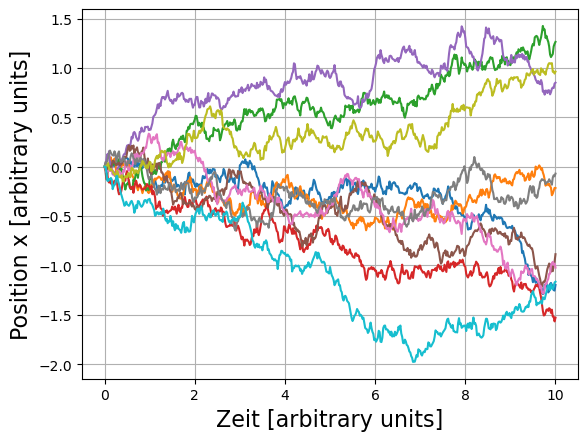

In [7]:
# Trajektorien visualisieren
for k in range(m):
    plt.plot(t, x[k])
plt.xlabel('Zeit [arbitrary units]', fontsize=16)
plt.ylabel('Position x [arbitrary units]', fontsize=16)
plt.grid(True)
plt.savefig('Brownian.png')
plt.show()

## Brownsche Bewegung in 2D

Für die Simulation der Brownschen Bewegung in 2D werden pro Zeitschritt zwei Zufallszahlen (eine für jede Dimension) benötigt.

In [8]:
# Parameter definieren
delta = 0.25 # Paramenter für die Geschwindigkeit der Brownschen Bewegung 
T = 10.0 # Zeit insgesamt
n = 200 # Anzahl Schritte
dt = T/n # Zeitschritt
nD = 2 # Anzahl Dimensionen 

In [9]:
# Initialisierung des arrays
x = np.zeros((nD,n+1))

In [10]:
# Berechnen der trajektorie
brownian(x[:,0], n, dt, delta, out=x[:,1:])

array([[-2.24663247e-02, -6.44310249e-04,  2.12257641e-02,
         5.94406393e-02,  1.38482914e-01,  1.76062329e-01,
         1.13852406e-01,  8.04511502e-02, -3.61049610e-02,
        -1.09280626e-01, -8.39263038e-02, -1.51826129e-01,
        -3.10363386e-02, -6.47841652e-02, -1.59792730e-01,
        -6.56580232e-02, -4.64054617e-02, -3.55159926e-02,
        -3.99949299e-02, -3.60046268e-02, -1.17101496e-01,
        -1.81404892e-01, -1.92548818e-01, -1.82101944e-01,
        -2.27599993e-01, -1.00400842e-01, -1.35644762e-01,
        -1.48947194e-01, -4.72857994e-02, -9.63251202e-02,
        -7.92251613e-02, -1.71380885e-01, -7.16562472e-02,
        -1.04121274e-01, -2.47752121e-02, -2.43339895e-03,
         3.18878818e-03,  3.10940613e-02, -5.75606093e-02,
        -4.22981295e-02, -2.32694617e-02, -3.51405247e-02,
        -2.55053747e-02,  3.54949935e-02,  9.68229399e-02,
         1.33617340e-01,  1.66278170e-01,  2.12485628e-01,
         2.26221623e-01,  2.41511955e-01,  1.66039788e-0

#### Visualisierung in 2D

Die Visualisierung zeigt die gesamte Trajektorie. Die Zeitdimension ist durch das Markieren der Anfangs und Endpunkte dargestellt.

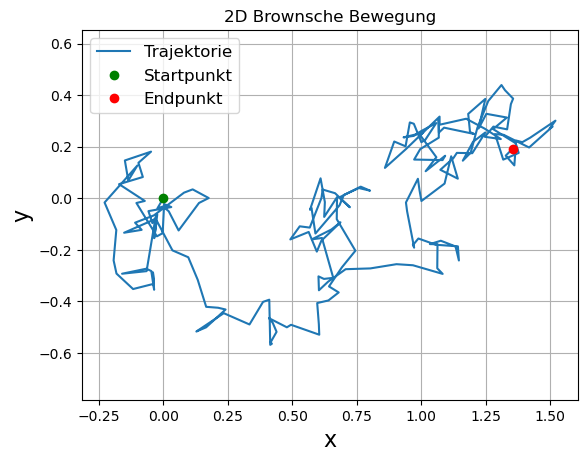

In [11]:
# Plotten der Trajektorie in 2D
plt.plot(x[0],x[1]) 

# Startpunkt und Endpunkt markieren
plt.plot(x[0,0],x[1,0], 'go') # Startpunkt grün
plt.plot(x[0,-1], x[1,-1], 'ro') # Endpunkt rot

# Achsen und Plot beschriften
plt.title('2D Brownsche Bewegung') # Titel
plt.xlabel('x', fontsize=16) # Beschriftung x-Achse
plt.ylabel('y', fontsize=16) # Beschriftung y-Achse
plt.axis('equal')
plt.grid(True) # Grid im Plot anzeigen
plt.legend([ "Trajektorie","Startpunkt","Endpunkt"], fontsize=12) # Datensätze beschriften
plt.show()

## Brownsche Bewegung in 3D

Für die Simulation der Brownschen Bewegung in 3D werden pro Zeitschritt drei Zufallszahlen (eine für jede Dimension) benötigt.

Für das 3D-Plotting werden einige zusätzliche Matplotlib-Funktionen benötigt:

In [12]:
from pylab import rcParams
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [13]:
# Parameter definieren
delta = 0.25 # Paramenter für die Geschwindigkeit der Brownschen Bewegung 
T = 10.0 # Zeit insgesamt
n = 100 # Anzahl Schritte
dt = T/n # Zeitschritt
nD = 3 # Anzahl Dimensionen 

In [14]:
# Initialisierung des arrays
x = np.zeros((nD,n+1))

In [15]:
# Berechnen der trajektorie
brownian(x[:,0], n, dt, delta, out=x[:,1:])
x.shape
x[0]

array([ 0.        ,  0.00806216,  0.00341887,  0.125958  ,  0.23818997,
        0.11599174,  0.0506659 , -0.02143596, -0.10017245, -0.16567458,
       -0.19145417, -0.07646919, -0.12109337, -0.15223771, -0.11071224,
       -0.1465236 , -0.15141825, -0.31036602, -0.32129857, -0.31613641,
       -0.17169371, -0.3627932 , -0.28138614, -0.15290978, -0.1102455 ,
       -0.10426182, -0.16450954, -0.20591002, -0.20972168, -0.29244383,
       -0.37699698, -0.23153934, -0.27665983, -0.18193647, -0.25676082,
       -0.22781755, -0.31447704, -0.41600006, -0.38584022, -0.36094659,
       -0.38192345, -0.42644016, -0.6427491 , -0.74960658, -0.86896402,
       -0.72794257, -0.68860745, -0.67134755, -0.67800224, -0.65885181,
       -0.73637293, -0.70330961, -0.63582254, -0.54121552, -0.5923757 ,
       -0.68016762, -0.57765989, -0.7175081 , -0.70386721, -0.6910847 ,
       -0.66092741, -0.60050857, -0.62820072, -0.62475636, -0.55682168,
       -0.5731436 , -0.58464535, -0.52089122, -0.43033324, -0.44

#### Visualisierung der Brownschen Bewegung in 3D

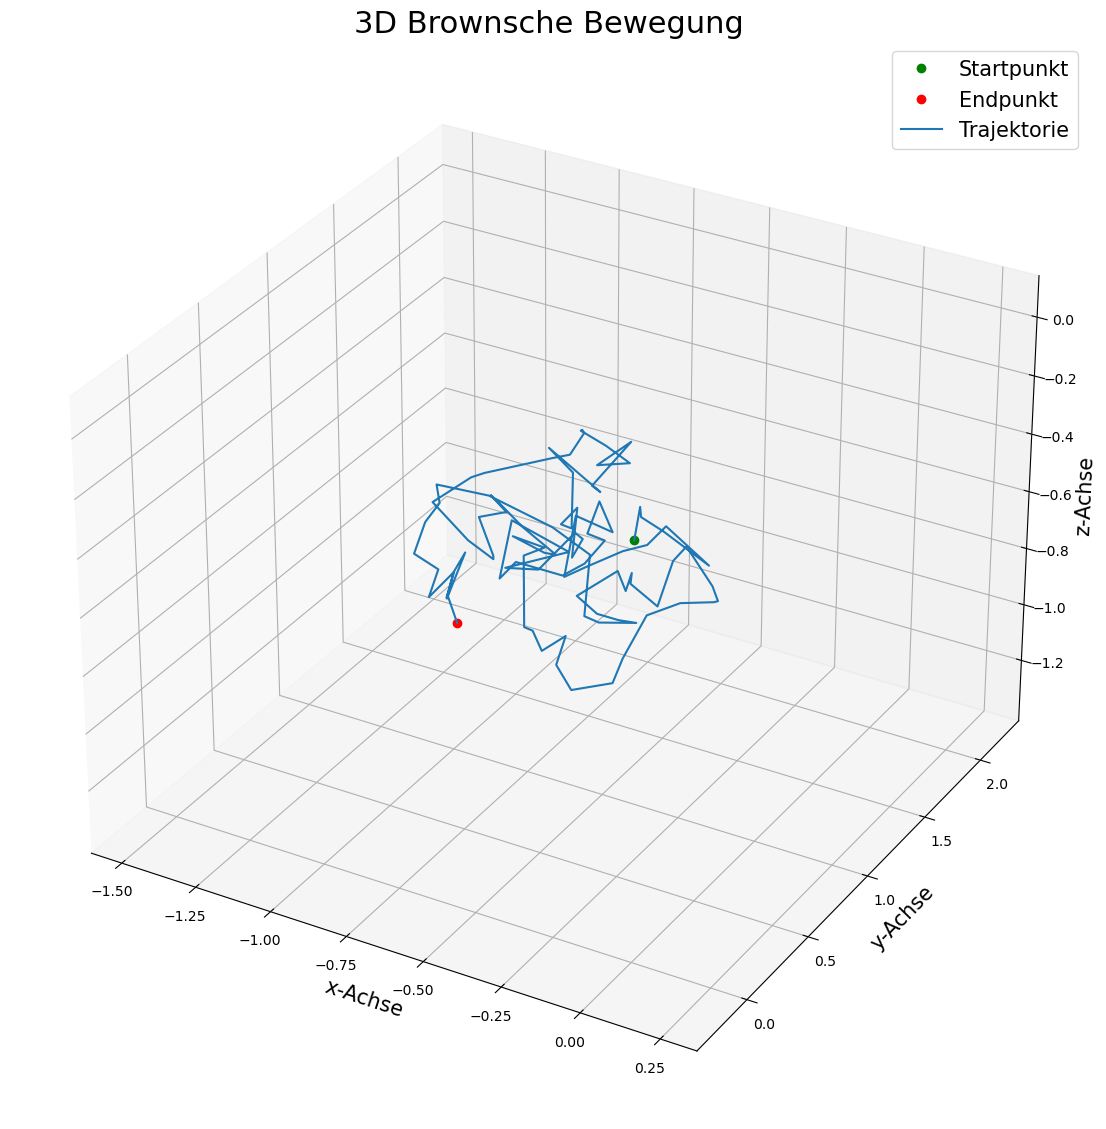

In [16]:
rcParams['figure.figsize'] = 14, 14 # Grösse des Plots
plt.rcParams.update({'font.size': 10}) # Grösse der Beschriftung

ax = plt.figure().add_subplot(projection='3d') # 3D Plot initialisieren
xdata, ydata, zdata = x[:3,:] # Simulationsdaten in 3 Dimensionen aufteilen

# Startpunkt und Endpunkt markieren
ax.plot(xdata[0], ydata[0], zdata[0],'go') # Startpunkt grün
ax.plot(xdata[n], ydata[n], zdata[n], 'ro') # Endpunkt rot

ax.set_xlabel('x-Achse', fontsize=15) # Label x-Achse
ax.set_ylabel('y-Achse', fontsize=15) # Label y-Achse
ax.set_zlabel("z-Achse", fontsize=15, rotation=90) # Label z-Achse

ax.plot3D(xdata, ydata, zdata) # Daten plotten
ax.set_title('3D Brownsche Bewegung', fontsize=22) # Titel des Plots

ax.legend(["Startpunkt","Endpunkt", "Trajektorie"], fontsize=15) # Beschrifgung der Daten

plt.show()